In [1]:
import pandas as pd

In [3]:
x = pd.read_csv('https://apmonitor.com/che263/uploads/Main/heart_rate.txt')

In [5]:
x.describe()

,Time (sec),Heart Rate (BPM)
count,241.000000,241.000000
mean,600.000000,142.983402
std,348.574478,11.387115
min,0.000000,103.000000
25%,300.000000,138.000000
50%,600.000000,147.000000
75%,900.000000,151.000000
max,1200.000000,154.000000


In [7]:
import numpy as np
def bpm(t,c0,c1,c2,c3):
    return c0+c1*t-c2*np.exp(-c3*t)

In [18]:
g = [150,0.01,90,0.01]

In [19]:
import matplotlib.pyplot as plt

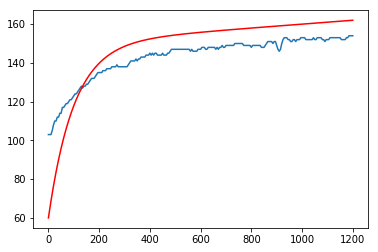

In [23]:
n = len(x['Time (sec)'])
y = np.empty(n)
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i],g[0],g[1],g[2],g[3])

plt.plot(x['Time (sec)'],x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'],y,'r-')

In [24]:
from scipy.optimize import curve_fit
t = x['Time (sec)']
hr = x['Heart Rate (BPM)']
c,cov = curve_fit(bpm,t,hr,g)

In [25]:
print(c)

[1.42373197e+02 9.24806139e-03 4.00292041e+01 6.84029133e-03]


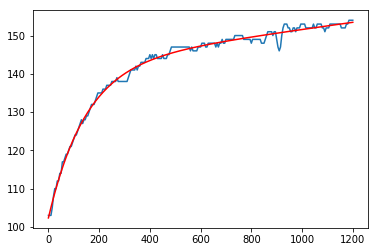

In [26]:
n = len(x['Time (sec)'])
y = np.empty(n)
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i],c[0],c[1],c[2],c[3])

plt.plot(x['Time (sec)'],x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'],y,'r-')

In [27]:
# Calculating the R^2 value
from sklearn.metrics import r2_score
print('R^2: ',r2_score(y,hr))

R^2:  0.9929887696706108
